In [5]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
from hockey.hockey_env import Mode
import time

In [6]:
np.set_printoptions(suppress=True)

In [7]:
# reload(h_env)

# Normal Game Play

In [8]:
env = h_env.HockeyEnv(mode = Mode.NORMAL)

have a look at the initialization condition: alternating who starts and are random in puck position

In [9]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

2025-02-14 13:31:27.453 Python[7737:272070] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


one episode with random agents

In [10]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [11]:
info, env.get_info_agent_two()

({'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0004882808303833008},
 {'winner': -1,
  'reward_closeness_to_puck': -0.12455238078119568,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0004882808303833008})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [12]:
env.close()

# Train Shooting

In [6]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [7]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Train DEFENDING

In [ ]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_DEFENSE)

In [ ]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Using discrete actions

In [ ]:
import random

In [ ]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [ ]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Hand-crafted Opponent

In [4]:
env = h_env.HockeyEnv()

In [5]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [6]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

2025-02-13 13:38:53.044 Python[6595:202183] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [7]:
np.mean(obs_buffer,axis=0)

array([-3.11442225,  0.39157263, -0.02303852,  0.12348986, -0.1285582 ,
       -0.03113055,  2.96722065,  0.47283915, -0.00234334,  0.07711003,
       -0.00190685,  0.03677379, -0.14970743,  0.72836726,  0.09304424,
       -0.18709327,  2.30677291,  0.83665339])

In [8]:
np.std(obs_buffer,axis=0)

array([ 0.54700413,  0.82705101,  0.66518614,  3.55408445,  4.70313974,
        3.63760999,  0.71710348,  0.43670494,  0.12685052,  3.73857778,
        1.48093269,  0.75248819,  2.09019592,  1.63455841, 20.42960431,
        8.17897199,  4.60528818,  2.95672829])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [9]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [10]:
import pylab as plt

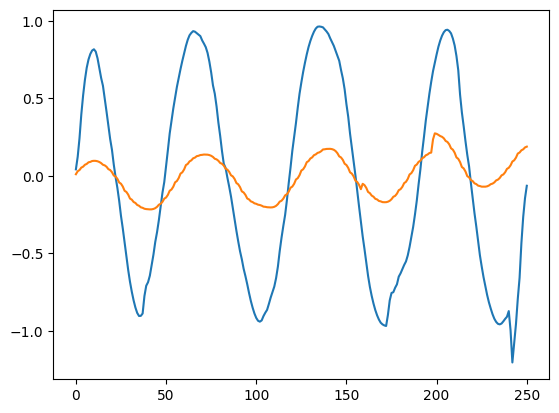

In [11]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

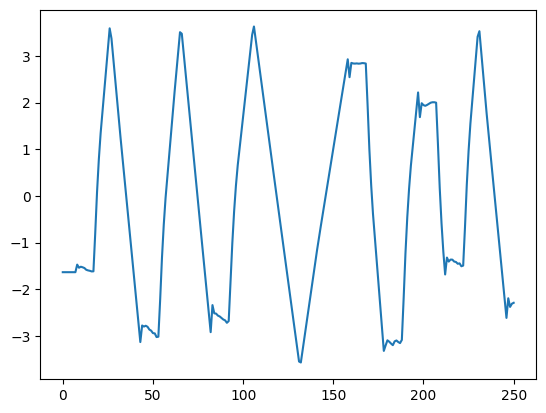

In [12]:
plt.plot(obs_buffer[:,12])

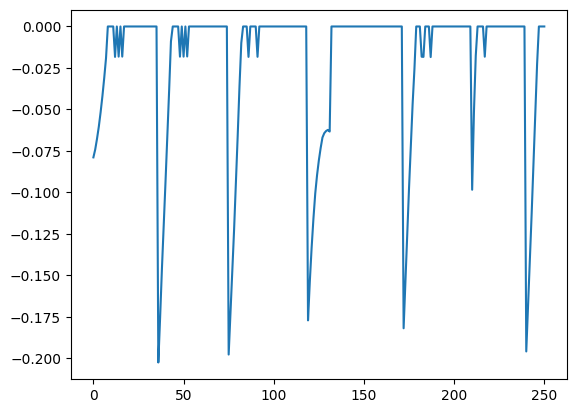

In [13]:
plt.plot(reward_buffer[:])

In [14]:
np.sum(reward_buffer)

-5.229749008897242

In [15]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.000459256820678711},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.000459256820678711},
 0.0,
 0.0)

In [16]:
env.close()

# Human Opponent

In [ ]:
env = h_env.HockeyEnv()

In [ ]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


In [ ]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


In [ ]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [ ]:
env.close()

# Check side consistency

In [ ]:
env = h_env.HockeyEnv()

In [ ]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [ ]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [ ]:
obs_buffer.shape

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

In [ ]:
winner_buffer

In [ ]:
np.mean(winner_buffer,axis=0)

In [ ]:
np.std(winner_buffer,axis=0)

In [ ]:
np.sum(reward_buffer), np.sum(reward2_buffer)

In [ ]:
env.close()